Recover from the noise   
**举个例子**
**假设我们想复原一张模糊的图片**
- **原图像信号 \( x \) 很稀疏**，比如它可以用少数几个基本图案（字典）来表示。
- **观测数据 \( y \) 是模糊的（有噪声）**，比如一张低分辨率的照片。
- **字典 \( D \) 是一组基础图片片段**（例如一组 Gabor 过滤器、DCT 基、Wavelet 基等）。
- **OMP 就是要找到那些“最能拼出这张照片”的片段**，然后重建原始的清晰图像。


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_sparse_coded_signal # 生成字典组成的信号
from sklearn.linear_model import OrthogonalMatchingPursuit,OrthogonalMatchingPursuitCV


In [9]:
n_components, n_features = 512, 100
n_nonzero_coefs = 17

$y = D * code$   
字典每列表示一个信号基向量。
观测信号就是字典基向量的线性组合

In [15]:
# 观测信号， 字典矩阵，稀疏系数
y, X, w = make_sparse_coded_signal(
    n_samples=1,      # 生成多少个信号
    n_components=n_components, # 字典的列数（即字典的基向量个数）
    n_features=n_features,   # 观测信号的维度（即字典的行数）
    n_nonzero_coefs=n_nonzero_coefs, # 真实信号的稀疏度（即有多少个非零元素）
    random_state=42   # 随机种子，保证结果可复现
)
print(y.shape, X.shape, w.shape)

(100,) (512, 100) (512,)


In [31]:
(idx,) = w.nonzero() # ❓
X = X.T


In [32]:
# distort the clean signal
y_noisy = y + 0.05*np.random.randn(len(y))


Text(0.5, 1.0, 'Sparse signal')

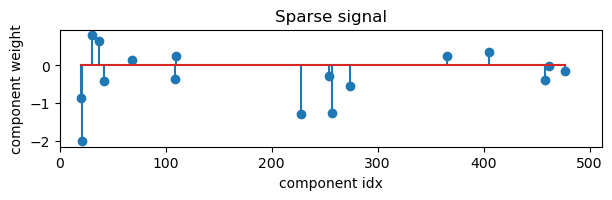

In [33]:
plt.figure(figsize=(7,7))
plt.subplot(4,1,1)
plt.ylabel('component weight')
plt.xlabel('component idx')
plt.xlim(0,512)
plt.stem(idx, w[idx])
plt.title("Sparse signal")

<StemContainer object of 3 artists>

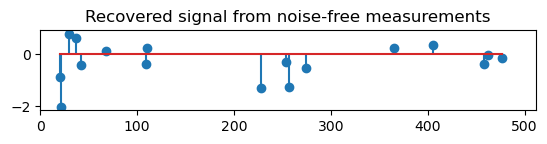

In [34]:
# plot the noise-free reconstruction
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r])